<a href="https://colab.research.google.com/github/aamirkhanov/mu2e_crv/blob/main/CRY5_efficiency_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install kerberos

In [ ]:
!apt-get -qq install krb5-user

In [ ]:
!wget https://authentication.fnal.gov/krb5conf/Linux/krb5.conf

In [ ]:
import os
os.environ['KRB5_CONFIG'] = 'krb5.conf'

#Copy files from FNAL

In [ ]:
!kinit amirkhan@FNAL.GOV


In [ ]:
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/oksuamirkhanzian/nts.owner.trkana-reco.version.sequencer.cry4v940loreco17000_v1.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940loreco17000_v1.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940hireco17000_v1.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940hireco15000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940loreco15000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940hireco13000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940loreco13000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940hireco11000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940loreco11000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940hireco9000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.amirkhan.RecoMC.cry4v940loreco9000.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.mcs.dzhadan.RecoMC.7000.art.root .
#!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/users/amirkhan/ana.dzhadan.RecoMChi.7000.root .
###!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/personal/amirkhan/projects/trkana/v10_10_01/onspill/trkanaCosmicCRYonReco010722.root .
!scp -o StrictHostKeyChecking=no -o GSSAPIAuthentication=yes -o GSSAPIDelegateCredentials=yes amirkhan@mu2egpvm04.fnal.gov:/mu2e/data/personal/amirkhan/projects/trkana/v10_10_01/onspill/trkanaCosmicCRYonRecoTriggered010722.root .


In [ ]:
#!cp ana.*.root drive/MyDrive/root_files_amirkhan/root_files_cry4/
!cp trkanaCosmicCRYonRecoTriggered010722.root drive/MyDrive/root_files_cry4/


#Init

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
!pip install uncertainties
from uncertainties import ufloat, unumpy
%pip -q install uproot3
%pip -q install --upgrade tables
import uproot3
import math


     |████████████████████████████████| 98 kB 3.9 MB/s 
     |████████████████████████████████| 117 kB 5.4 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 


In [2]:

h5file='drive/MyDrive/root_files_cry4/cry4df_Artem2.h5'

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append(main_path+'root_files_cry4')

Mounted at /content/drive


In [3]:
#%pip install -q scikit-hep
%pip install -q scikit-hep==3.1.0
from skhep.visual import MplPlotter as skh_plt
%pip install uproot3

!pip install -I git+https://github.com/oksuzian/mu2etools.git
from mu2etools import utils, cuts

     |████████████████████████████████| 61 kB 12 kB/s 
     |████████████████████████████████| 213 kB 16.4 MB/s 
     |████████████████████████████████| 1.9 MB 48.2 MB/s 
     |████████████████████████████████| 212 kB 67.0 MB/s 
     |████████████████████████████████| 322 kB 61.2 MB/s 
     |████████████████████████████████| 245 kB 37.9 MB/s 
     |████████████████████████████████| 40 kB 4.1 MB/s 
     |████████████████████████████████| 5.4 MB 36.9 MB/s 
     |████████████████████████████████| 8.1 MB 25.4 MB/s 
     |████████████████████████████████| 72 kB 261 kB/s 
     |████████████████████████████████| 117 kB 49.6 MB/s 
     |████████████████████████████████| 401 kB 50.7 MB/s 
     |████████████████████████████████| 68 kB 5.6 MB/s 
     |████████████████████████████████| 191 kB 44.3 MB/s 
  Cloning https://github.com/oksuzian/mu2etools.git to /tmp/pip-req-build-2653q_d1
  Running command git clone -q https://github.com/oksuzian/mu2etools.git /tmp/pip-req-build-2653q_d1
  Created whe

In [4]:
import uproot3
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from plotly import graph_objs as go
import pylab
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)
plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

import warnings
warnings.filterwarnings('ignore')

#Load dataframes

In [ ]:
def default_flatname(branchname, fieldname, index):
    """This replaces the dot in the column names with underscores"""
    out = branchname.replace(".", "_")
    if not isinstance(branchname, str):
        out = branchname.decode("utf-8")
    if fieldname is not None:
        fieldname.replace(".", "_")
        out += "_" + fieldname
    if index != ():
        out += "[" + "][".join(str(x) for x in index) + "]"
    return out

In [ ]:
dfCRY5 = pd.DataFrame()
file = uproot3.open("drive/MyDrive/root_files_cry4/trkanaCosmicCRYonRecoTriggered010722.root")
trkana = file["TrkAnaNeg"]["trkana"]
dfCRY5 = trkana.pandas.df(['*'], flatname=default_flatname, flatten=False)

# Read dataframes

In [5]:
dfCRY4 = pd.read_hdf(h5file, mode='r')

In [6]:
dfCRY5 = pd.read_hdf('drive/MyDrive/root_files_cry4/cry5df_Artem_save.h5', mode='r')

In [ ]:
!ls drive/MyDrive/root_files_cry4/cry5df_Artem_save.h5

drive/MyDrive/root_files_cry4/cry5df_Artem_save.h5


#Define cuts

In [7]:
#Default MDC-style cut box
cuts = [
    "(de_status > 0)",
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 105)",
#    "((deent_d0 + 2./deent_om) > 450)",
#    "((deent_d0 + 2./deent_om) < 680)",
#    "(is_triggered)"
]
cut_tbox = " & ".join(cuts)

#PID, TrkQual and cut on events with an usptream leg
cuts = [
    "(dequal_TrkQual > 0.8)",
    #"(dequal_TrkPID > 0.95)",
    "(ue_status <= 0)"
]
cut_pid_trkqual_ue = " & ".join(cuts)

# Extended momentum window cut`
cuts = [
    "(deent_mom > 100)",
    "(deent_mom < 110)"
]
cut_extmom = " & ".join(cuts)

# Loose box cuts
cuts = [
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 205)",
#    "((deent_d0 + 2./deent_om) > 450)",
#    "(is_triggered)"
]
cut_lbox = " & ".join(cuts)

crv_time = "((-de_t0 + crvinfo__timeWindowStart) > 50 | (de_t0-crvinfo__timeWindowStart) > 150.0)"



In [8]:
#Combime cuts
cut_nomom  = cut_tbox +" & "+cut_pid_trkqual_ue
cut_extmom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_extmom
cut_loose  = cut_lbox +" & "+cut_pid_trkqual_ue

#Backgound estimation

In [9]:
dfCRY5.rename(columns = {'dequal__TrkQual':'dequal_TrkQual', 'dequal__TrkPID':'dequal_TrkPID', 'bestcrvmc__pdgId':'_pdgId'}, inplace = True)

In [10]:
LIVETIME_CRY5=3E7
def get_ratio(cut):
  total = len(dfCRY4.query('lyield==15000 & is_high==0 & is_triggered'))
  cutted = len(dfCRY4.query(cut + "& lyield==15000 & is_high==0 & is_triggered"))
  bg_norm = cutted/utils.LIVETIME_LO*utils.LIVETIME_MU2E
  ratio = cutted / total
  print("CRY4; cut: %s;\nTOTAL=%s, AFTER CUT=%s, RATIO=%s, BG=%s" % (cut, total, cutted, ratio, bg_norm))

  total = len(dfCRY5)
  cutted = len(dfCRY5.query(cut))
  bg_norm = cutted/LIVETIME_CRY5*utils.LIVETIME_MU2E
  ratio = cutted / total
  print("CRY5; cut: %s;\nTOTAL=%s, AFTER CUT=%s, RATIO=%s, BG=%s\n" % (cut, total, cutted, ratio, bg_norm))




In [11]:
get_ratio(cut_tbox)
#get_ratio(cut_pid_trkqual_ue)
get_ratio(cut_lbox)
get_ratio('%s & %s' % (cut_tbox, cut_extmom))
get_ratio(cut_extmom)
get_ratio('(deent_mom > 100) & (deent_mom < 110)')
#get_ratio('%s & %s & %s & %s' % (cut_tbox, cut_pid_trkqual_ue, cut_lbox, cut_extmom))




CRY4; cut: (de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105);
TOTAL=1058683, AFTER CUT=187649, RATIO=0.17724758024828963, BG=3473.8659176029964
CRY5; cut: (de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105);
TOTAL=112849, AFTER CUT=32449, RATIO=0.2875435316219018, BG=3742.4513333333334

CRY4; cut: (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 205);
TOTAL=1058683, AFTER CUT=269510, RATIO=0.2545710094523101, BG=4989.323702514714
CRY5; cut: (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 205);
TOTAL=112849, AFTER CUT=51748, RATIO=0.45855966822922667, BG=5968.269333333333

CRY4; cut: (de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105) & (de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105) & (dequal_TrkQual > 0.8) & (ue_status <= 0) & (deent_mom > 

#Draw plots CRY4 vs CRY5

In [12]:
def drawCompareCRY(value):
  cuts = [cut_tbox, "%s & %s" % (cut_tbox, cut_pid_trkqual_ue), "%s & %s & %s" % (cut_tbox, cut_pid_trkqual_ue, cut_extmom)]
  cutNum=0
  for cut in cuts:
    #dfCRY4tmp = dfCRY4.query('lyield==15000 & is_high==0 & (de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105)')[value]
    #dfCRY5tmp = dfCRY5.query('(de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105)')[value]

    dfCRY4tmp = dfCRY4.query('lyield==15000 & is_high==0 & %s' % cut)[value]
    dfCRY5tmp = dfCRY5.query('%s' % cut)[value]

    plt.hist(dfCRY4tmp,bins=100, range=None, histtype='step', weights=len(dfCRY5tmp)/len(dfCRY4tmp)*np.ones_like(dfCRY4tmp), label='CRY4');
    plt.hist(dfCRY5tmp,bins=100, range=None, histtype='step', label='CRY5');
    
    plt.legend()
    if cutNum==0: cutName='cut_tbox'
    if cutNum==1: cutName='cut_tbox & cut_pid_trkqual_ue'
    if cutNum==2: cutName='cut_tbox & cut_pid_trkqual_ue & cut_extmom'
    cutNum=cutNum+1

    plt.title("%s\n%s" % (value, cutName))
    plt.figure()

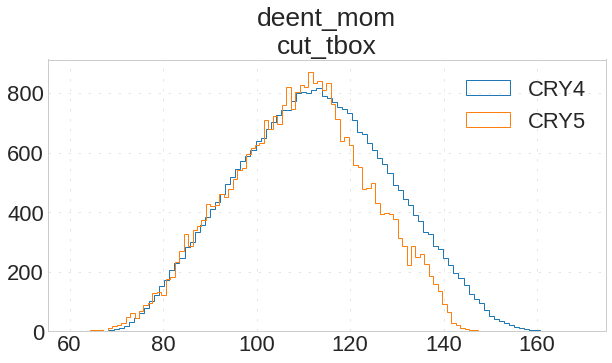

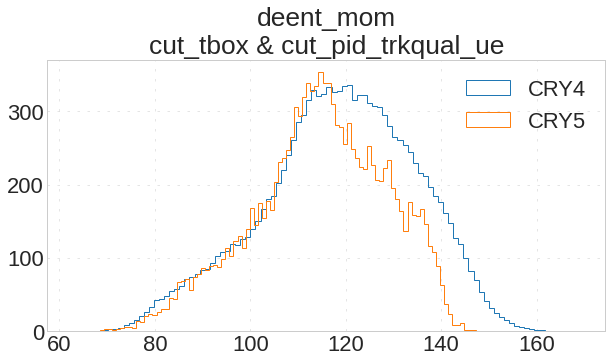

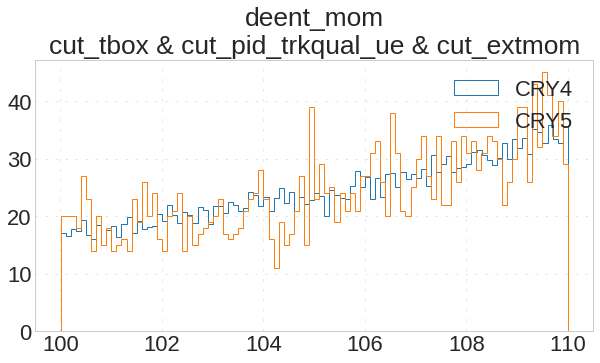

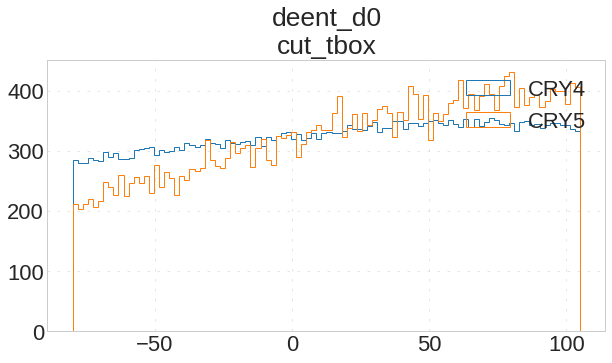

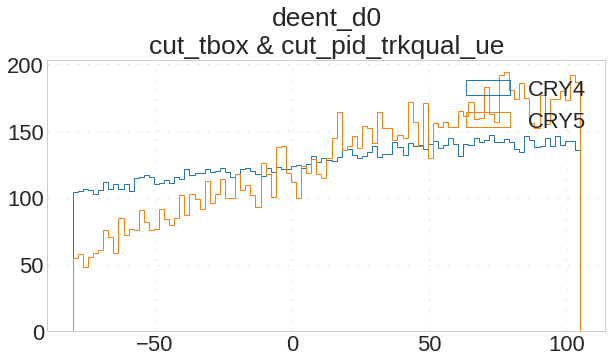

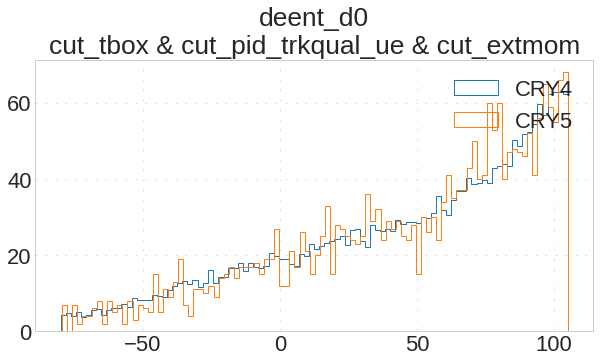

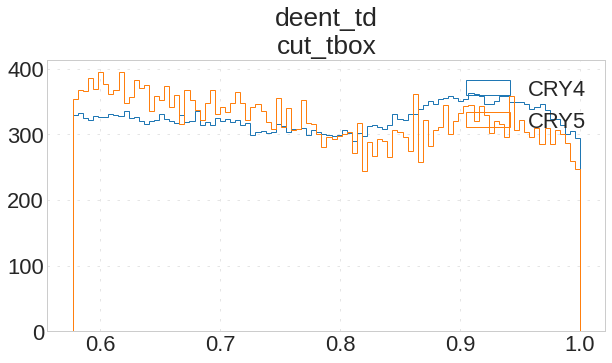

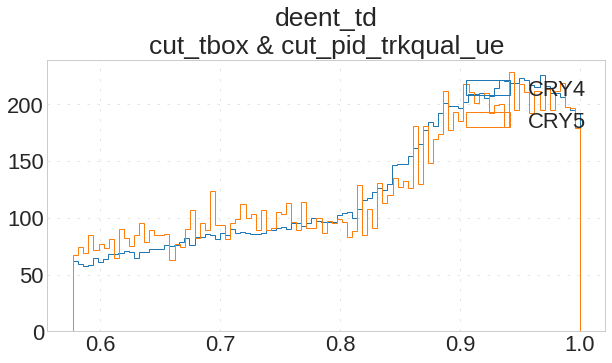

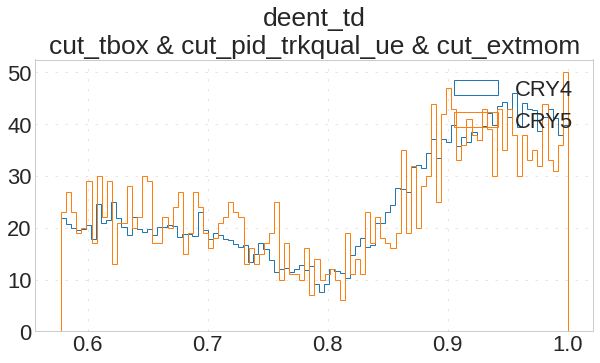

<Figure size 720x360 with 0 Axes>

In [13]:
values = ['deent_mom', 'deent_d0', 'deent_td']
for val in values:
  drawCompareCRY(val)


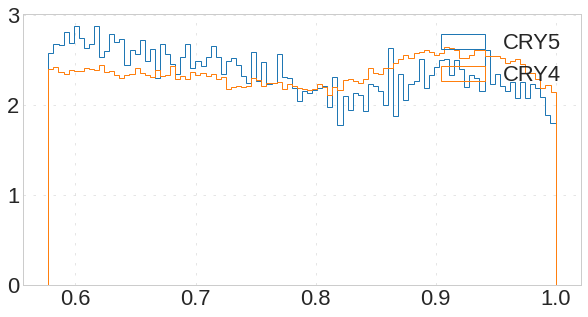

In [ ]:
plt.hist(dfCRY5.query('(de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105)')['deent_td'],bins=100, range=(0.5,1.1), histtype='step', density=True, label='CRY5');
plt.hist(dfCRY4.query('lyield==15000 & is_high==0 & (de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105)')['deent_td'],bins=100, range=(0.5,1.1), histtype='step', density=True, label='CRY4');
plt.legend()

#get events info

In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
list(dfCRY5)
#dfCRY5


,evtinfo__eventid,evtinfo__runid,evtinfo__subrunid,de_status,de_pdg,de_nhits,de_t0,deent_mom,deent_d0,deent_p0,deent_om,deent_z0,deent_td,dequal_TrkPID,dequal_TrkQual,demc_pdg,demcgen_pdg,demcgen_gen,demcgen_posx,demcgen_posy,demcgen_posz,trigbits,ue_status,_totalPEs,_nHitCounters,_totalEnergyDeposited,_x,_y,_z,_crvSectorNumber,_crvSectorType,_pdgId,is_high,lyield,crvinfo__dT,deent_d0_om,is_triggered,crvinfo__crvSectorType,crvinfo__x,crvinfo__y,crvinfo__z,crvinfo__timeWindowStart,crvinfo__timeWindowEnd,crvinfo__PEs,crvinfo__nCoincidenceHits,crvinfomc__x,crvinfomc__y,crvinfomc__z,crvinfomc__pdgId,crvinfomc__time,crvinfomc__depositedEnergy,bestcrv
entry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22980,2701,0,1,11,57,776.0,75.6,420.4,0.2,0.0,419.5,2.4,-1.0,0.0,-13,-13,38,2643.1,15365.4,6699.0,2,-1000,39,4,15.8,-3491.6,2673.1,12872.0,10,3,-13,0,7000,50.4,610.9,False,3.0,-3904.0,2721.9,12900.8,826.3,831.7,39.0,3.0,-3475.6,2761.1,12895.1,-13.0,771.8,11.8,0.0
1,43407,2701,0,1,11,48,748.6,98.3,145.0,-0.3,0.0,182.1,1.0,1.0,1.0,11,13,38,-1213.6,15365.4,-11054.7,532622,-1000,0,3,11.8,-4205.8,2673.1,3356.4,9,3,13,0,7000,-999999.0,602.3,True,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
2,63553,2701,0,2,11,49,819.7,110.3,81.3,0.7,0.0,-326.4,1.0,1.0,1.0,11,-13,38,-1360.8,15365.4,-10982.8,532622,-1000,0,3,11.6,-4390.7,2673.1,3345.5,9,3,-13,0,7000,-999999.0,597.2,True,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
3,75863,2701,0,1,11,78,845.0,65.4,321.0,1.6,0.0,42.8,0.8,1.0,1.0,11,-13,38,-4344.8,15365.4,-5623.8,8,-1000,0,3,11.6,-5021.9,2673.1,4961.2,9,3,-13,0,7000,-999999.0,656.6,True,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
4,83180,2701,0,1,11,71,800.8,79.8,382.8,0.1,0.0,121.3,1.8,1.0,1.0,11,-13,38,44037.5,15365.4,-54779.4,8200,-1000,140,4,13.0,-6444.6,204.1,6956.9,0,1,-13,0,7000,31.7,636.2,True,1.0,-6491.9,275.5,7013.1,832.5,852.3,140.0,11.0,-6444.6,204.1,6956.9,-13.0,789.3,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560389,242125,2701,49999,1,11,61,873.6,86.5,68.4,0.9,0.0,-210.5,0.5,1.0,1.0,11,13,38,2316.3,15365.4,-8235.9,8206,-1000,261,4,15.0,-3833.8,2673.1,7721.7,10,3,13,1,17000,25.3,582.3,True,3.0,-3904.0,2701.6,7706.4,898.8,913.0,261.0,13.0,-3818.4,2761.1,7681.6,13.0,855.0,15.0,0.0
560390,341974,2701,49999,1,11,50,881.3,107.3,-97.9,0.2,0.0,-183.3,0.5,0.2,1.0,11,-13,38,-10990.4,15365.4,12220.1,1597582,1,414,4,20.2,-6022.1,2673.1,13831.3,10,3,-13,1,17000,-59.9,545.8,True,3.0,-3904.0,2706.2,13851.0,821.4,853.2,414.0,15.0,-6083.2,2761.1,13890.7,-13.0,784.0,20.2,0.0
560391,386142,2701,49999,1,11,61,751.1,77.3,279.1,2.0,0.0,-518.0,1.0,-1.0,1.0,11,-13,38,-6690.1,15365.4,-10246.5,8192,-1000,564,4,25.9,-5460.5,2673.1,3525.1,9,3,-13,1,17000,-3.3,637.6,False,3.0,-3904.0,2707.2,3514.6,747.9,773.0,564.0,16.0,-5496.7,2761.1,3498.7,-13.0,707.8,25.9,0.0


#Get efficiency values (not used for now)

In [ ]:
all, all_err, _, _, _, _ = utils.getNormBackground(dfCRY5, 'is_high==1', 1)
nonvetoed, nonvetoed_err, _, _, _, _ = utils.getNormBackground(dfCRY5, 'crvinfo__timeWindowStart<0', 1)

all = ufloat(all, math.sqrt(all))
nonvetoed = ufloat(nonvetoed, math.sqrt(nonvetoed))

print(all)
print(nonvetoed)




ValueError: ignored

In [ ]:
def getInefficiencyCRY4(cut):
  
  ineff=[]
  ineffErr=[]
  lyield=[]
  for ly in range(7000, 17001, 2000): # loop through light yield values
    #all, all_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& abs(_pdgId)==13 & lyield==%d '%(ly), 1)
    #nonvetoed, nonvetoed_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& abs(_pdgId)==13 & crvinfo__timeWindowStart<0 & lyield==%d'%(ly), 1)
    all, all_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& lyield==%d '%(ly), 1)
    nonvetoed, nonvetoed_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& crvinfo__timeWindowStart<0 & lyield==%d'%(ly), 1)

    if all==0:
      all = 1

    all = ufloat(all, math.sqrt(all))
    nonvetoed = ufloat(nonvetoed, math.sqrt(nonvetoed))
    ineff.append(unumpy.nominal_values(nonvetoed/all))
    ineffErr.append(unumpy.std_devs(nonvetoed/all))
    lyield.append(ly*utils.LYIELD_SCALE)


  return lyield, ineff, ineffErr, unumpy.nominal_values(all), unumpy.nominal_values(nonvetoed)

In [ ]:
LIVETIME_CRY5=3E7
LIVETIME_MU2E=3.46E6
scale=1

def getNormBackgroundCRY5(df, cuts, scale):
  raw_count_CRY5 = len(dfCRY5.query('%s' % cuts))
  ave_CRY5 = raw_count_CRY5/LIVETIME_CRY5*LIVETIME_MU2E/scale
  err_CRY5 = math.sqrt(raw_count_CRY5)/LIVETIME_CRY5*LIVETIME_MU2E/scale
  return ave_CRY5, err_CRY5

def getInefficiencyCRY5(cut):
  ineff=[]
  ineffErr=[]
  lyield=[]
  all, all_err = getNormBackgroundCRY5(dfCRY5, cut, 1)
  nonvetoed, nonvetoed_err = getNormBackgroundCRY5(dfCRY5, cut+' & crvinfo__timeWindowStart<0', 1)
  #nonvetoed, nonvetoed_err = getNormBackgroundCRY5(dfCRY5, cut, 1)

  if all==0:
    all = 1
  all = ufloat(all, math.sqrt(all))
  nonvetoed = ufloat(nonvetoed, math.sqrt(nonvetoed))
  ineff.append(unumpy.nominal_values(nonvetoed/all))
  ineffErr.append(unumpy.std_devs(nonvetoed/all))
  lyield.append(ly*utils.LYIELD_SCALE)
  return lyield, ineff, ineffErr, unumpy.nominal_values(all), unumpy.nominal_values(nonvetoed)

In [ ]:
#lyield, ineff, ineffErr, all, nonvetoed = getInefficiencyCRY4(cuts.cut_pid_trkqual_ue)
#getInefficiencyCRY4(cuts.cut_pid_trkqual_ue)
utils.getNormBackground(dfCRY4, 'ue_status <= 0', 1)


In [ ]:
getInefficiencyCRY5('ue_status <= 0')

In [ ]:
cut = 'ue_status <= 0'
nonvetoed, nonvetoed_err = getNormBackgroundCRY5(dfCRY5, 'ue_status <= 0', 1)

In [ ]:
lyield, ineff, ineffErr, all, nonvetoed = getInefficiencyCRY4('ue_status <= 0')


In [ ]:
ineff